In [ ]:
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

start = 100
hack = 0.4
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_unbalanced_fixed_controller'

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step([10, 10, 10])

In [ ]:
from pycigar.utils.output import plot_new
from pycigar.utils.logging import logger
Logger = logger()

In [ ]:
plot_new(Logger.log_dict, Logger.custom_metrics, 0, True)

In [1]:
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

misc_inputs = '../data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '../data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '../data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '../data/ieee37busdata_regulator_attack/breakpoints.csv'

misc_inputs_bat = '../data/ieee37busdata_battery/misc_inputs.csv'
dss = '../data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar_bat = '../data/ieee37busdata_battery/load_solar_data.csv'
bat = '../data/ieee37busdata_battery/battery_inputs.txt'
breakpoints = '../data/ieee37busdata_regulator_attack/breakpoints.csv'

In [2]:
import pandas as pd

solar_load_bat = pd.read_csv(load_solar_bat)
solar_load = pd.read_csv(load_solar)

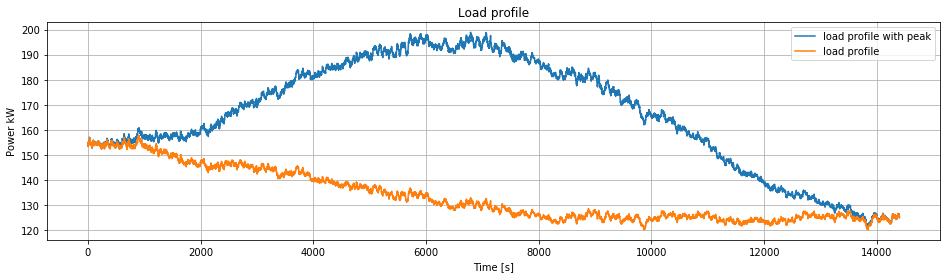

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(solar_load_bat['S701a']),label="load profile with peak")
plt.plot(np.asarray(solar_load['S701a']),label="load profile")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.grid()
plt.title('Load profile')
plt.xlabel('Time [s]')
plt.ylabel('Power kW')
plt.legend()


In [4]:
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box

misc_inputs = misc_inputs_bat
dss = dss
load_solar = load_solar_bat
breakpoints = breakpoints
bat = bat

start = 100
hack = 0.4
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack, battery_path=bat)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]

del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_unbalanced_fixed_controller'
start = 3601
duration = 14400 - start

sim_params['vectorized_mode'] = True
sim_params['scenario_config']['start_end_time'] = [start, start + duration]
sim_params['scenario_config']['multi_config'] = False
sim_params['scenario_config']['custom_configs']['slack_bus_voltage'] = 1.04 #1.02
sim_params['scenario_config']['custom_configs']['slack_bus_voltage'] = 1.02
#sim_params['scenario_config']['custom_configs']['solar_scaling_factor'] = 1
sim_params['simulation_config']['custom_configs']['solution_control_mode'] = -1 #2
sim_params['simulation_config']['custom_configs']['solution_control_mode'] = 2

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False

step_count = 0

while not done:
    _, r, done, _ = env.step([10, 10, 10])

    if step_count % 10 == 0:
        print("Step {}".format(step_count))
    step_count +=1

print("Finished at step {}".format(step_count))
    

Instructions for updating:
non-resource variables are not supported in the long term
Step 0
Step 10
Step 20
Step 30
Step 40
Step 50
Step 60
Step 70
Step 80
Step 90
Step 100
Step 110
Step 120
Step 130
Step 140
Step 150
Step 160
Step 170
Step 180
Step 190
Step 200
Step 210
Step 220
Step 230
Step 240
Step 250
Step 260
Step 270
Step 280
Step 290
Step 300
Step 310
Step 320
Step 330
Step 340
Step 350
Finished at step 359


In [5]:
from pycigar.utils.logging import logger
log_dict = logger().log_dict
custom_metrics = logger().custom_metrics

In [6]:
log_dict['bsd_s701a'].keys()

dict_keys(['control_setting', 'current_capacity', 'SOC', 'bat_cycle', 'p_con', 'p_in', 'p_out', 'node'])

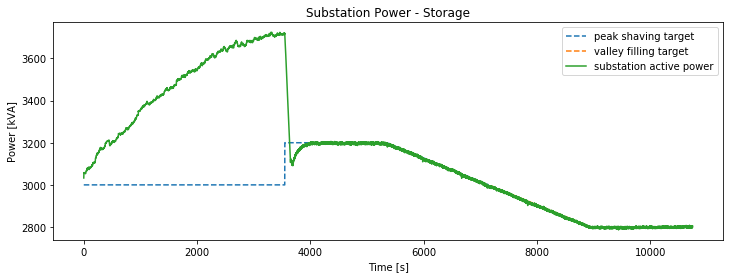

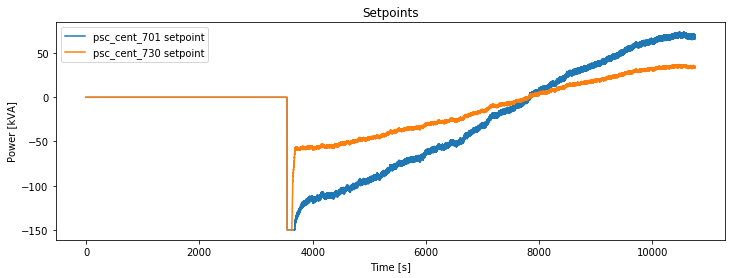

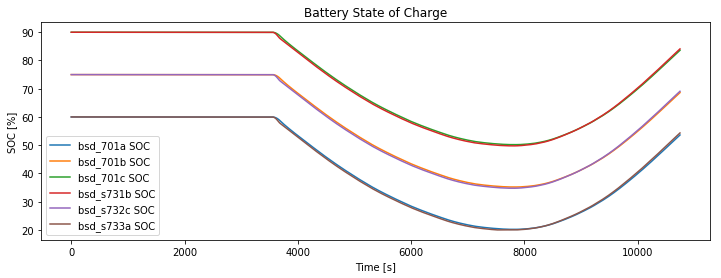

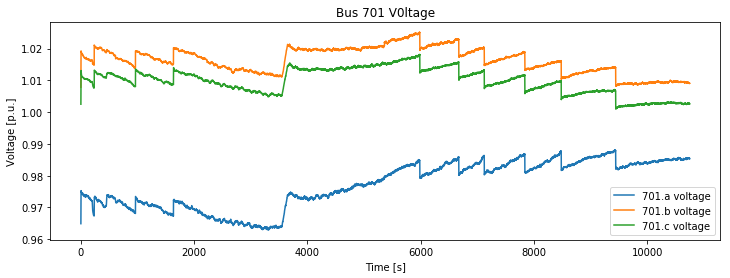

In [7]:
import matplotlib.pyplot as plt
plt.switch_backend('Tkagg')
import numpy as np
%matplotlib inline

# ps_target = np.asarray(log_dict['psc_cent_701']['p_target'])[3600-51:7200-51]
ps_target = np.asarray(log_dict['psc_cent_701']['p_target'])[0:7200-51]
vf_target = np.asarray(log_dict['psc_cent_701']['p_target'])[7200:]

fig1 = plt.figure(figsize = [12, 4])
# plt.plot(np.arange(0,len(ps_target))+3600,ps_target,'--',label="peak shaving target")
plt.plot(np.arange(0,len(ps_target)),ps_target,'--',label="peak shaving target")
plt.plot(np.arange(0,len(vf_target))+7200,vf_target,'--',label="valley filling target")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/ps_vf_power.png', bbox_inches='tight')


# fig1 = plt.figure(figsize = [12, 4])
# plt.plot(log_dict['psc_cent_701']['measured_active_power_lpf'],label="p set")
# plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
# plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
# plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
# plt.title('Setpoints')
# plt.xlabel('Time [s]')
# plt.ylabel('Power [kVA]')
# plt.legend()

# plt.savefig('/home/michael/Desktop/temp/SPADES/substation_power.png', bbox_inches='tight')



fig1 = plt.figure(figsize = [12, 4])
plt.plot(log_dict['psc_cent_701']['p_set'],label="psc_cent_701 setpoint")
plt.plot(log_dict['psc_cent_730']['p_set'],label="psc_cent_730 setpoint")
# plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
# plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
# plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
plt.title('Setpoints')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/psc_setpoints.png', bbox_inches='tight')



fig1 = plt.figure(figsize = [12, 4])
plt.plot(np.array(log_dict['bsd_s701a']['SOC'])*100,label="bsd_701a SOC")
plt.plot(np.array(log_dict['bsd_s701b']['SOC'])*100,label="bsd_701b SOC")
plt.plot(np.array(log_dict['bsd_s701c']['SOC'])*100,label="bsd_701c SOC")
plt.plot(np.array(log_dict['bsd_s731b']['SOC'])*100,label="bsd_s731b SOC")
plt.plot(np.array(log_dict['bsd_s732c']['SOC'])*100,label="bsd_s732c SOC")
plt.plot(np.array(log_dict['bsd_s733a']['SOC'])*100,label="bsd_s733a SOC")
# plt.plot(np.array(log_dict['bsd_s76a']['SOC'])*100,label="s76a SOC")
# plt.plot(np.array(log_dict['bsd_s76b']['SOC'])*100,label="s76b SOC")
# plt.plot(np.array(log_dict['bsd_s76c']['SOC'])*100,label="s76c SOC")
# plt.plot(np.array(log_dict['bsd_s100c']['SOC'])*100,label="s100c SOC")
# plt.plot(np.array(log_dict['bsd_s102c']['SOC'])*100,label="s102c SOC")
# plt.plot(np.array(log_dict['bsd_s103c']['SOC'])*100,label="s103c SOC")
plt.title('Battery State of Charge')
plt.xlabel('Time [s]')
plt.ylabel('SOC [%]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/bsd_soc.png', bbox_inches='tight')


fig1 = plt.figure(figsize = [12, 4])

plt.plot(log_dict['s701a']['voltage'],label='701.a voltage')
plt.plot(log_dict['s701b']['voltage'],label='701.b voltage')
plt.plot(log_dict['s701c']['voltage'],label='701.c voltage')
plt.title('Bus 701 V0ltage')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [p.u.]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/701_voltage.png',bbox_inches='tight')

plt.show() 

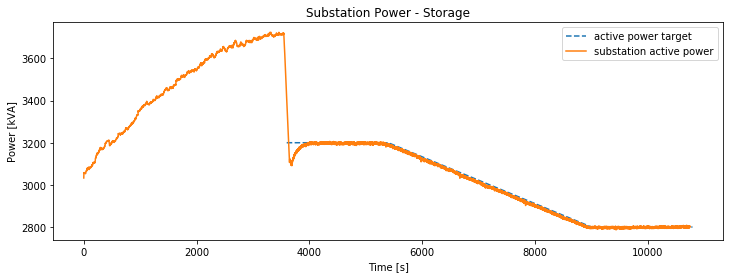

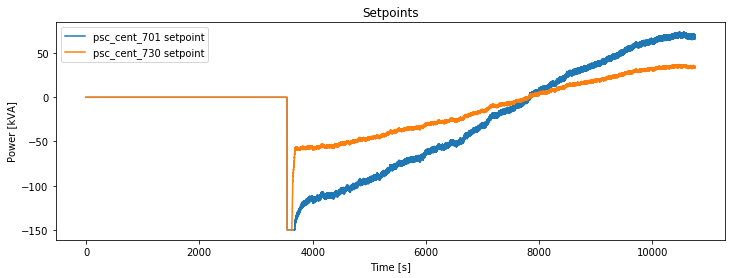

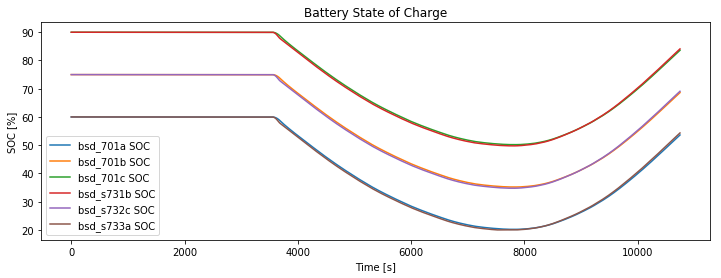

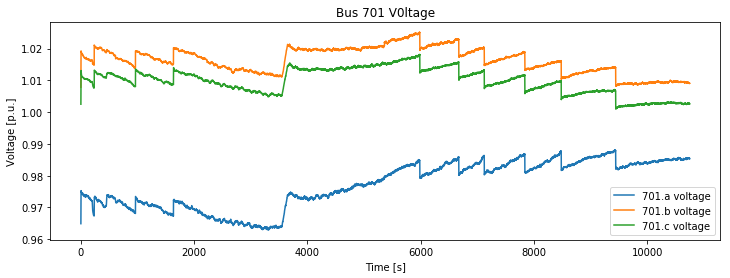

In [10]:
import matplotlib.pyplot as plt
plt.switch_backend('Tkagg')
import numpy as np
%matplotlib inline

# ps_target = np.asarray(log_dict['psc_cent_701']['p_target'])[3600-51:7200-51]
ntps_target = np.asarray(log_dict['psc_cent_701']['p_target'])[3600-51:]
# vf_target = np.asarray(log_dict['psc_cent_701']['p_target'])[7200:]

fig1 = plt.figure(figsize = [12, 4])
# plt.plot(np.arange(0,len(ps_target))+3600,ps_target,'--',label="peak shaving target")
plt.plot(np.arange(0,len(ntps_target))+3600,ntps_target,'--',label="active power target")
# plt.plot(np.arange(0,len(vf_target))+7200,vf_target,'--',label="valley filling target")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/ps_vf_power.png', bbox_inches='tight')


# fig1 = plt.figure(figsize = [12, 4])
# plt.plot(log_dict['psc_cent_701']['measured_active_power_lpf'],label="p set")
# plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
# plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
# plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
# plt.title('Setpoints')
# plt.xlabel('Time [s]')
# plt.ylabel('Power [kVA]')
# plt.legend()

# plt.savefig('/home/michael/Desktop/temp/SPADES/substation_power.png', bbox_inches='tight')



fig1 = plt.figure(figsize = [12, 4])
plt.plot(log_dict['psc_cent_701']['p_set'],label="psc_cent_701 setpoint")
plt.plot(log_dict['psc_cent_730']['p_set'],label="psc_cent_730 setpoint")
# plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
# plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
# plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
plt.title('Setpoints')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/psc_setpoints.png', bbox_inches='tight')



fig1 = plt.figure(figsize = [12, 4])
plt.plot(np.array(log_dict['bsd_s701a']['SOC'])*100,label="bsd_701a SOC")
plt.plot(np.array(log_dict['bsd_s701b']['SOC'])*100,label="bsd_701b SOC")
plt.plot(np.array(log_dict['bsd_s701c']['SOC'])*100,label="bsd_701c SOC")
plt.plot(np.array(log_dict['bsd_s731b']['SOC'])*100,label="bsd_s731b SOC")
plt.plot(np.array(log_dict['bsd_s732c']['SOC'])*100,label="bsd_s732c SOC")
plt.plot(np.array(log_dict['bsd_s733a']['SOC'])*100,label="bsd_s733a SOC")
# plt.plot(np.array(log_dict['bsd_s76a']['SOC'])*100,label="s76a SOC")
# plt.plot(np.array(log_dict['bsd_s76b']['SOC'])*100,label="s76b SOC")
# plt.plot(np.array(log_dict['bsd_s76c']['SOC'])*100,label="s76c SOC")
# plt.plot(np.array(log_dict['bsd_s100c']['SOC'])*100,label="s100c SOC")
# plt.plot(np.array(log_dict['bsd_s102c']['SOC'])*100,label="s102c SOC")
# plt.plot(np.array(log_dict['bsd_s103c']['SOC'])*100,label="s103c SOC")
plt.title('Battery State of Charge')
plt.xlabel('Time [s]')
plt.ylabel('SOC [%]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/bsd_soc.png', bbox_inches='tight')


fig1 = plt.figure(figsize = [12, 4])

plt.plot(log_dict['s701a']['voltage'],label='701.a voltage')
plt.plot(log_dict['s701b']['voltage'],label='701.b voltage')
plt.plot(log_dict['s701c']['voltage'],label='701.c voltage')
plt.title('Bus 701 V0ltage')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [p.u.]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/701_voltage.png',bbox_inches='tight')

plt.show() 

In [ ]:
plt.plot(log_dict['bsd_s701a']['bat_cycle'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(log_dict['psc_cent_701']['p_target']),'--',label="substation active power")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(log_dict['psc_cent_701']['measured_active_power_lpf'],label="p set")
plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
plt.title('Setpoints')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.show()

In [ ]:
len(log_dict['s701a']['voltage'])

In [ ]:
fig1 = plt.figure(figsize = [12, 4])

plt.plot(log_dict['s701a']['voltage'],label='701.a voltage')
plt.plot(log_dict['s701b']['voltage'],label='701.b voltage')
plt.plot(log_dict['s701c']['voltage'],label='701.c voltage')
plt.title('Bus 701 V0ltage')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [p.u.]')
plt.legend()

plt.savefig('/home/michael/Desktop/temp/SPADES/701_voltage.png',bbox_inches='tight')

plt.show()

In [ ]:
plt.plot(log_dict['s701a']['voltage'])
plt.plot(log_dict['s701b']['voltage'])
plt.plot(log_dict['s701c']['voltage'])

In [ ]:
plt.plot(log_dict['u_metrics']['u_worst'])
plt.plot(log_dict['u_metrics']['u_mean'])

In [ ]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(log_dict['s701a']['voltage'][1000:4000], label='voltage ph. A')
plt.plot(log_dict['s701b']['voltage'][1000:4000], label='voltage ph. B')
plt.plot(log_dict['s701c']['voltage'][1000:4000], label='voltage ph. C')
plt.grid()
plt.title('Voltage profile')
plt.xlabel('Time [s]')
plt.ylabel('Voltage (.p.u)')
plt.legend()

In [ ]:
sim_params 

In [ ]:
plt.plot(log_dict['y_metrics']['y_worst'])
plt.plot(log_dict['y_metrics']['y_mean'])

In [ ]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='Imbalance worst')
plt.plot(np.array(log_dict['u_metrics']['u_mean'])*100, label='Imbalance mean')
plt.grid()
plt.title('Voltage Imbalance')
plt.xlabel('Time [s]')
plt.ylabel('Imbalance (%)')
plt.legend()

In [ ]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(log_dict['psc_cent_701']['p_target']),'--',label="substation active power")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
plt.grid()
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()

In [ ]:
log_dict.keys()